In [ ]:
#1st understand data 
#Convert char to numbers (ML only understand numarical value )
# feature scaling(stander scaler/ minmax scaler)
# split the data
# train the model
# make predictions
# evaluate the model
# visualize result
# improve/experiment
# wrap_up

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



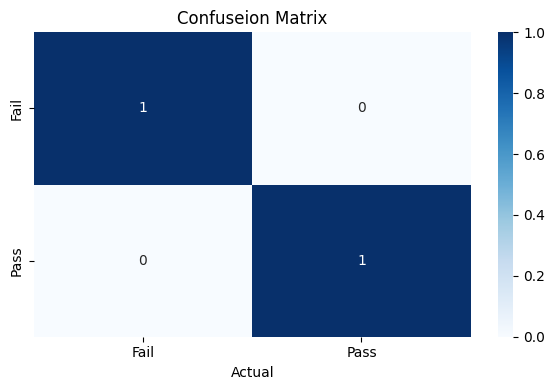

--------Predict your result-------


KeyboardInterrupt: Interrupted by user

In [4]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns




data= pd.read_csv('student_success_dataset.csv')
df = data.copy()

#1st understand data 
'''
print('Sample rows:\n', df.head())
print("Dataset shape: ", f'Rows :{df.shape[0]} , Columns: {df.shape[1]}')
print("Data Info : \n" , df.info())
print("Summary Statistics:\n", df.describe(include='all'))
print("Missing Value: \n", df.isnull().sum())
'''

#Convert char to numbers (ML only understand numarical value )

le = LabelEncoder()
df["Internet"] = le.fit_transform(df['Internet'])
df["Passed"] = le.fit_transform(df['Passed'])

"""print("\n\n",df)
print("datatypes after cleaning \n",df.dtypes)"""

# feature scaling(stander scaler/ minmax scaler)

features = ['StudyHours','Attendance','PastScore','SleepHours']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features]= scaler.fit_transform(df[features])

# split the data
X= df_scaled[features] #fearures
y= df_scaled['Passed'] #target
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=2 , random_state=42 )

# train the model

model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions

y_pred = model.predict(X_test)

print("Classification Report")
print(classification_report(y_test , y_pred))

conf_matrix = confusion_matrix(y_test,y_pred )
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True , fmt="d", cmap="Blues", xticklabels=["Fail","Pass"], yticklabels=["Fail","Pass"])
plt.xlabel("Predicted")
plt.xlabel("Actual")
plt.title("Confuseion Matrix")
plt.tight_layout()
plt.show()

print("--------Predict your result-------")
try:
    study_hours = float(input("Enter study hours:"))
    attendance = float(input("Enter Attendance:"))
    past_score = float(input("Enter past score:"))
    sleep_hours = float(input("Enter sleep hours:"))

    user_input_df = pd.DataFrame([{
        'StudyHours': study_hours,
        'Attendance': attendance,
        'PastScore': past_score,
        'SleepHours': sleep_hours 
    }])

    user_input_scaled =scaler.transform(user_input_df)
    prediction = model.predict(user_input_df)[0]

    result = "Pass" if prediction==1 else "Fail"
    print(f"Predictction Base on Input : {result}")

except Exception as e:
    print("An error Occured" , e)

# evaluate the model
# visualize result
# improve/experiment
# wrap_up

